First, make sure you can load, read and show an image from the dataset.

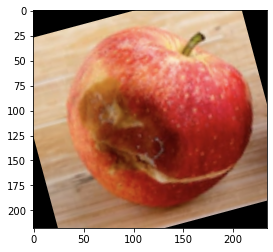

In [2]:
%matplotlib inline
# The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
# ~ thank you Ritu dhoot (https://stackoverflow.com/a/53079880)
import cv2 as cv
from matplotlib import pyplot as plt

#Import image
image = cv.imread("./dataset/train/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.50.52 PM.png")

#Show the image with matplotlib
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

Try to isolate this apple, let's remove the background using GrabCut algorithm.

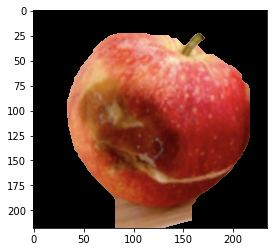

In [3]:
%matplotlib inline
import numpy as np

def grab(image):
    #Create a center of interest rectangle
    margin = .1
    (image_width, image_height, channels) = image.shape
    rect = (int(margin*image_width),int(margin*image_height),int((1-margin)*image_width),int((1-margin)*image_height))

    #Execute grab cut
    mask = np.zeros(image.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    cv.grabCut(image,mask,rect,bgdModel,fgdModel,3,cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    return image*mask2[:,:,np.newaxis]

#Show the image with matplotlib
plt.imshow(cv.cvtColor(grab(image), cv.COLOR_BGR2RGB))
plt.show()

Now, make sure you can load train, test images from the dataset :

In [4]:
import random
from os import walk

def load_images(datasetpath):
    filenames = next(walk(datasetpath), (None, None, []))[2]
    # 💡 Comment the line above if you want to load the whole dataset
    filenames = random.sample(filenames, 100)
    return [grab(cv.imread('./{}/{}'.format(datasetpath, filename))) for filename in filenames]

test_fresh_apples = load_images("./dataset/test/freshapples")
test_rotten_apples = load_images("./dataset/test/rottenapples")
train_fresh_apples = load_images("./dataset/train/freshapples")
train_rotten_apples = load_images("./dataset/train/rottenapples")


Now, let's compate fresh orange histograms vs rotten orange histograms.

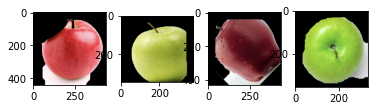

[200.18216666 196.80132099 243.19431503] 30.14%
[ 75.16177312  75.12862247 203.13902417] 69.86%
[127.73719256 218.72575507 212.09500446] 44.54%
[ 58.30685044 166.73907485 154.24399724] 55.46%
[162.96305302 162.41885875 199.00461048] 26.32%
[ 45.09837263  38.18722606 105.9384005 ] 73.68%
[178.70046216 208.49171962 196.06008088] 14.03%
[ 70.38059995 196.78211474 152.30278603] 85.97%


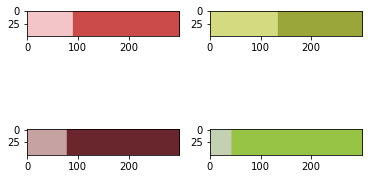

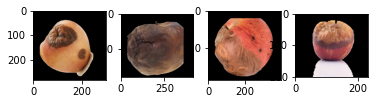

[ 43.51660027  68.26401062 118.52810978] 31.40%
[100.71659014 146.10101174 204.85161107] 68.60%
[ 89.49765777 108.36709496 139.99993308] 35.65%
[54.71434124 61.81299745 87.72864917] 64.35%
[ 68.42558655  93.10025408 174.1067683 ] 45.67%
[ 95.05797828 121.14667638 216.68287295] 54.33%
[219.00075358 219.17950264 234.93850791] 33.64%
[ 87.29873011  99.65116279 162.67005814] 66.36%


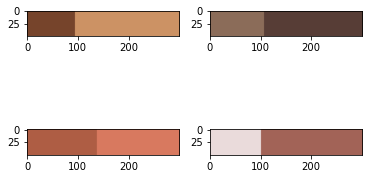

In [15]:
# #Retreive and show histogram
# channel = ('h','s','v')
# color = ('magenta','yellow','cyan')

# def retreive_mean(image):
#     image = cv.cvtColor(image, cv.COLOR_BGR2HLS)
#     avg_color_per_row = np.average(image, axis=0)
#     return np.average(avg_color_per_row, axis=0)

# def retreive_hist(image):
#     image = cv.cvtColor(image, cv.COLOR_BGR2HLS)
#     return [cv.calcHist([image[:,:,i]],[0],None,[244],[6,250]) for i in [0,1,2]]

# def show_hist(hist, xlim=244, ylim=5000):
#     for i,col in enumerate(color):
#         plt.plot(hist[i],color = col)
#         plt.xlim([0,xlim])
#         plt.ylim([0,ylim])

import cv2, numpy as np
from sklearn.cluster import KMeans

def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

def retreive_cluster(image):
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    reshape = image.reshape((image.shape[0] * image.shape[1], 3))
    reshape = [c for c in reshape if np.mean(c) > 10]
    # Find and display most dominant colors
    return KMeans(n_clusters=2,max_iter=30).fit(reshape)

def visualize_img_colors(image):
    cluster = retreive_cluster(image)
    visualize = visualize_colors(cluster, cluster.cluster_centers_)
    visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
    plt.imshow(visualize)


### FRESH APPLES

#Import fresh orange images
fresh = random.sample(train_fresh_apples, 4)

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(fresh[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(fresh[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(fresh[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(fresh[3], cv.COLOR_BGR2RGB))
plt.show()

# fresh_hists = [retreive_hist(image) for image in fresh]

plt.subplot(221)
visualize_img_colors(fresh[0])
plt.subplot(222)
visualize_img_colors(fresh[1])
plt.subplot(223)
visualize_img_colors(fresh[2])
plt.subplot(224)
visualize_img_colors(fresh[3])
plt.show()

### ROTTEN APPLES

#Import rotten orange images
rotten = random.sample(train_rotten_apples, 4)

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(rotten[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(rotten[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(rotten[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(rotten[3], cv.COLOR_BGR2RGB))
plt.show()

# rotten_hists = [retreive_hist(image) for image in rotten]

plt.subplot(221)
visualize_img_colors(rotten[0])
plt.subplot(222)
visualize_img_colors(rotten[1])
plt.subplot(223)
visualize_img_colors(rotten[2])
plt.subplot(224)
visualize_img_colors(rotten[3])
plt.show()

In [28]:
fersh_models = [
    [75.15700388, 75.12360908, 203.13857697],
    [200.17110849, 196.79142099, 243.18826651],
    [127.73719256, 218.72575507, 212.09500446],
    [58.30685044, 166.73907485, 154.24399724],
    [45.09837263,  38.18722606, 105.9384005],
    [162.96305302, 162.41885875, 199.00461048],
    [70.38219073, 196.78242014, 152.3037193],
    [178.7115755, 208.49210324, 196.06278891]
]
rotten_models = [
    [100.55315447, 145.91623164, 204.73157703],
    [43.36641358, 67.97659669, 118.0219741],
    [89.49765777, 108.36709496, 139.99993308],
    [54.71434124, 61.81299745, 87.72864917],
    [68.42416452, 93.10177243, 174.06359085],
    [95.03433135, 121.11923829, 216.67946034],
    [87.29873011, 99.65116279, 162.67005814],
    [219.00075358, 219.17950264, 234.93850791]
]

def cluster_score(image):
    cluster_centers = retreive_cluster(image).cluster_centers_
    fresh = np.min([np.linalg.norm(center-model) for model in fersh_models for center in cluster_centers])
    rotten = np.min([np.linalg.norm(center-model) for model in rotten_models for center in cluster_centers])
    return (fresh - rotten) / (fresh + rotten + .1)

Notice : looks like rotten orange have wider red and green histograms than fresh orange ones.

fresh image1 average 0.3136013858095117
fresh image2 average 0.28570203215591683
fresh image3 average 0.2715504907914534
fresh image4 average 0.3545303424151985


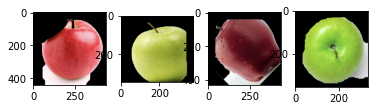

rotten image1 average 0.4410969246505843
rotten image2 average 0.4493595977243112
rotten image3 average 0.49559659985942417
rotten image4 average 0.5444059864940247


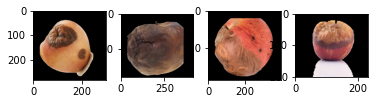

In [26]:
threshold = 1

def abs_dst(image):
    ddepth = cv.CV_16S
    kernel_size = 5
    # Remove noise by blurring with a Gaussian filter
    image_blur = cv.GaussianBlur(image, (3, 3), 0)
    # Convert the image to grayscale
    image_gray = cv.cvtColor(image_blur, cv.COLOR_BGR2GRAY)
    # Apply Laplace function
    dst = cv.Laplacian(image_gray, ddepth, ksize=kernel_size)
    # converting back to uint8
    return cv.convertScaleAbs(dst)

# LAPLACE SCORE

def laplace_score(image):
    arr = np.asarray(abs_dst(image)).flatten()
    filter_arr = arr > threshold
    newarr = arr[filter_arr]
    return newarr.mean() / 255

### FRESH ORANGES

print("fresh image1 average", laplace_score(fresh[0]))
print("fresh image2 average", laplace_score(fresh[1]))
print("fresh image3 average", laplace_score(fresh[2]))
print("fresh image4 average", laplace_score(fresh[3]))

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(fresh[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(fresh[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(fresh[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(fresh[3], cv.COLOR_BGR2RGB))
plt.show()

### ROTTEN ORANGES

print("rotten image1 average", laplace_score(rotten[0]))
print("rotten image2 average", laplace_score(rotten[1]))
print("rotten image3 average", laplace_score(rotten[2]))
print("rotten image4 average", laplace_score(rotten[3]))

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(rotten[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(rotten[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(rotten[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(rotten[3], cv.COLOR_BGR2RGB))
plt.show()

Now, let's plot our feature vector over the whole train dataset !

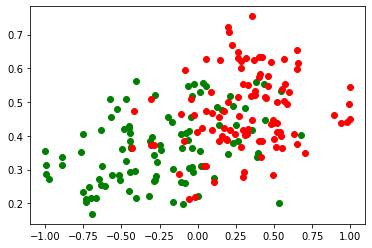

In [29]:
fresh_vectors = np.asarray([[cluster_score(fresh), laplace_score(fresh)] for fresh in train_fresh_apples]).T
rotten_vectors = np.asarray([[cluster_score(rotten), laplace_score(rotten)] for rotten in train_rotten_apples]).T

# scatter fresh vectors
xf, yf = fresh_vectors
plt.scatter(xf,yf,color="green")

# scatter rotten vectors
xr, yr = rotten_vectors
plt.scatter(xr,yr,color="red")

plt.show()


Deduce the accuracy (Binary Classification, Logistic Regression) :

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

# create the binary classifier
(_, lf) = np.shape(fresh_vectors)
(_, lr) = np.shape(rotten_vectors)
X = np.concatenate((fresh_vectors, rotten_vectors), axis=1)
y = np.concatenate((np.full((lf), 0), np.full((lr), 1)))
X, y = shuffle(X.T, y, random_state=0)

clf = LogisticRegression(random_state=0).fit(X, y)

# load the test vectors
test_fresh_vectors = fresh_vectors
test_rotten_vectors = rotten_vectors

# calculate the accuracy
(_, ltf) = np.shape(test_fresh_vectors)
(_, ltr) = np.shape(test_rotten_vectors)
tX = np.concatenate((test_fresh_vectors.T, test_rotten_vectors.T), axis=0)
ty = np.concatenate((np.full((ltf), 0), np.full((ltr), 1)))

print("Acc :")
print(1-np.mean(np.abs(clf.predict(tX)-ty)))

Acc :
0.795
